In [251]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [276]:
def Attack(a,w=[]):
    # Initialize x, Z. x[i] = -1 means x[i] has unknown value.
    n = len(a)
    x = [-1 for _ in range(n)]
    Z = [-1 for _ in range(n)]
    
    if a[0] == 0:
        Z[0] = 0
        x[0] = 0

    for i in reversed(range(n-1)):
        # a_{i+1} - a_{i} = x_{i+1} + Z_{i+1} - Z_{i}
        diff = a[i+1] - a[i]
        
        if diff == 2:
            # (x_{i+1} + Z_{i+1} - Z_{i} == 2)
            #   => Z_i = 0, Z_{i+1} = 1, x_{i+1} = 1
            Z[i] = 0
            Z[i+1] = 1
            x[i+1] = 1
        elif diff == -1:
            # (x_{i+1} + Z_{i+1} - Z_{i} == -1)
            #   => Z_i = 1, Z_{i+1} = 0, x_{i+1} = 0
            Z[i] = 1
            Z[i+1] = 0
            x[i+1] = 0
        elif Z[i+1] == 1 and diff == 0:
            # (x_{i+1} + 1 - Z_{i} == 0)
            #   => Z_i = 1, x_{i+1} = 0
            Z[i] = 1
            x[i+1] = 0
        elif Z[i+1] == 0 and diff == 1:
            # (x_{i+1} + 0 - Z_{i} == 1)
            #   => Z_i = 0, x_{i+1} = 1
            Z[i] = 0
            x[i+1] = 1
        

    for i in range(n-1):
        # a_{i+1} - a_{i} = x_{i+1} + Z_{i+1} - Z_{i}
        diff = a[i+1] - a[i]
        if Z[i] == 0 and diff == 0:
            Z[i+1] = 0
            x[i+1] = 0
        elif Z[i] != -1 and Z[i+1] != -1:
            #  x_{i+1} = a_{i+1} - a_{i} - Z_{i+1} + Z_{i}
            x[i+1] = diff - Z[i+1] + Z[i]
        elif x[i+1] == -1:
            if w == []:
                x[i+1] = diff
            else:
                x[i+1] = w[i+1]
    
    if Z[0] != -1:
        x[0] = a[0] - Z[0]
    else:
        x[0] = a[0] if w == [] else w[0]
    
    return x
    

In [319]:
ns = [100,500,1000,5000,50000]
trials = 100
results_a = pd.DataFrame([[None for _ in range(trials)] for _ in range(len(ns))],index=ns)
results_b = pd.DataFrame([[None for _ in range(trials)] for _ in range(len(ns))],index=ns)

for n in ns:
    for i in range(trials):
        startime = time.time()
        true_x = [1 if random.uniform(0,1) < .5 else 0 for _ in range(n)]
        true_Z = [1 if random.uniform(0,1) < .5 else 0 for _ in range(n)]
        a = [sum(true_x[:j+1])+true_Z[j] for j in range(n)]
        w = [true_x[j] if random.uniform(0,1) < 2/3 else 1-true_x[j] for j in range(n)]
        xs_a = Attack(a)
        diffs_a = sum([1 if xs_a[j] == true_x[j] else 0 for j in range(n)])/n
        results_a.loc[n,i] = diffs_a
        
        xs_b = Attack(a,w)
        diffs_b = sum([1 if xs_b[j] == true_x[j] else 0 for j in range(n)])/n
        results_b.loc[n,i] = diffs_b


Part (a)

In [320]:
a_means = results_a.T.agg([np.mean, np.std]).T
a_means.head()

,mean,std
100,0.773700,0.042371
500,0.773880,0.021617
1000,0.772590,0.013460
5000,0.774856,0.006954
50000,0.773836,0.002069


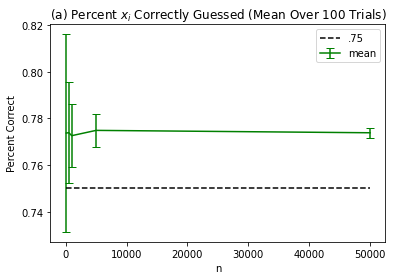

In [321]:
# results_a.T.plot.box(y=ylabel='Percent Correct', xlabel='n', title='(a) Percent $x_i$ Correctly Guessed (Mean Over {} Trials)'.format(trials), color='green') 
a_means.plot(y="mean",yerr="std",capsize=4,ylabel='Percent Correct', xlabel='n', title='(a) Percent $x_i$ Correctly Guessed (Mean Over {} Trials)'.format(trials), color='green') 
plt.plot([0,ns[-1]],[.75,.75],label='.75',color='black',linestyle='--')
plt.legend()
plt.show()

Part (b)

In [322]:
b_means = results_b.T.agg([np.mean, np.std]).T
b_means.head()

,mean,std
100,0.805600,0.044661
500,0.804120,0.019355
1000,0.802490,0.015722
5000,0.803626,0.006555
50000,0.803105,0.001902


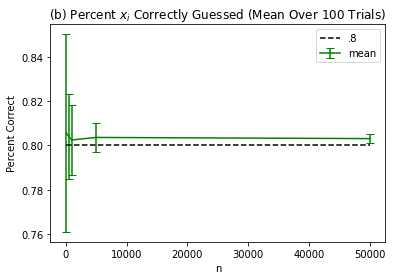

In [323]:
b_means.plot(y="mean",yerr="std",capsize=4,ylabel='Percent Correct', xlabel='n', title='(b) Percent $x_i$ Correctly Guessed (Mean Over {} Trials)'.format(trials), color='green') 
plt.plot([0,ns[-1]],[.8,.8],label='.8',color='black',linestyle='--')
plt.legend()
plt.show()